# **Appendix 1 - Initial Results and Code**

In [ ]:
!pip install pandas numpy seaborn matplotlib

**Load and Clean the Data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Load the dataset
df = pd.read_csv("cstads_2122_pumf.csv")

# Dataset overview
print("Original DataFrame:\n")
print(df.shape)
df.describe()
df.info()

# Remove duplicates if any
df = df.drop_duplicates()

# Identify missing values
df.replace({96: pd.NA, 98: pd.NA, 99: pd.NA, 996: pd.NA, 999: pd.NA}, inplace=True)

# Calculate the percentage of missing values per column
missing_percentage = df.isnull().mean() * 100

# Drop columns with more than 50% missing values
df_cleaned = df.loc[:, missing_percentage <= 50]

# Cleaned dataset overview
print("\nCleaned DataFrame (columns with more than 50% missing values removed):\n")
print(df_cleaned.shape)
df_cleaned.describe()
df_cleaned.info()

# Move cleaned dataframe to df for convenience
df = df_cleaned

Original DataFrame:

(61096, 168)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61096 entries, 0 to 61095
Columns: 168 entries, SEQID to DVAVCIGD
dtypes: float64(1), int64(167)
memory usage: 78.3 MB

Cleaned DataFrame (columns with more than 50% missing values removed):

(61096, 133)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61096 entries, 0 to 61095
Columns: 133 entries, SEQID to DVLAST30
dtypes: float64(1), int64(3), object(129)
memory usage: 62.0+ MB


**Generate Summary Statistics**

In [ ]:
# Count unique values for categorical variables
print("\nCategorical Data Distribution:\n", df[['DVGENDER']].apply(pd.Series.value_counts))
print("\n", df[['PROVID']].apply(pd.Series.value_counts))
print("\n", df[['GRADE']].apply(pd.Series.value_counts))
print("\n", df[['DVURBAN']].apply(pd.Series.value_counts))


Categorical Data Distribution:
           DVGENDER
DVGENDER          
2            28903
1            27168

         PROVID
PROVID        
24       10863
48        9260
10        7032
12        6999
59        6885
35        6745
47        5596
11        4616
46        3100

        GRADE
GRADE       
8      12500
7      12436
9      11055
10     10218
11      8859
12      6028

          DVURBAN
DVURBAN         
1          49577
2          11519


Remove Data that is not relevant to our analysis

In [ ]:
import re

# Define the prefixes to exclude
exclude_prefixes = ["UND", "MET", "XTC", "HAL", "HER", "COC", "SYN", "BZP", "TNB", "TRP", "GLU", "SAL",
                    "SLP", "STI", "DEX", "GRV", "SED", "POLY", "DR", "BEH", "BUL"]

# Create a regex pattern to match column names starting with these prefixes
pattern = re.compile(r'^(?:' + '|'.join(exclude_prefixes) + r').*')

# Identify columns to drop
columns_to_drop = [col for col in df.columns if pattern.match(col)]

# Drop the unwanted columns
df_filtered = df.drop(columns=columns_to_drop)

# Print the removed columns
print("Removed columns:", columns_to_drop)

# Remaining dataset overview
print("\nCleaned DataFrame (columns not associated with smoking/alcohol/cannabis removed):\n")
print(df_filtered.shape)
df_filtered.describe()
df_filtered.info()

# Move cleaned dataframe to df for convenience
df = df_filtered

Removed columns: ['UND_010', 'UND_020', 'MET_010', 'XTC_010', 'HAL_010', 'HER_010', 'COC_010', 'SYN_010', 'BZP_010', 'TNB_010', 'TRP_010', 'GLU_010', 'SAL_010', 'SLP_010', 'STI_030', 'DEX_010', 'GRV_010', 'STI_080', 'STI_050', 'SED_050', 'SED_030', 'POLY_010', 'POLY_020', 'POLY_030', 'POLY_040', 'POLY_050', 'POLY_060', 'POLY_070', 'POLY_080', 'POLY_090', 'POLY_100', 'POLY_110', 'POLY_120', 'POLY_130', 'POLY_140', 'POLY_150', 'POLY_160', 'POLY_170', 'POLY_180', 'MET_030', 'XTC_030', 'HAL_030', 'COC_030', 'STI_070', 'DR_010', 'DR_020', 'DR_060', 'DR_070', 'BEH_010', 'BEH_020', 'BEH_030', 'BEH_040', 'BUL_010', 'BUL_020', 'BUL_030', 'BUL_040', 'BUL_050', 'BUL_060', 'BUL_070', 'BUL_080', 'BUL_090', 'BUL_100', 'BUL_110', 'BUL_120']

Cleaned DataFrame (columns not associated with smoking/alcohol/cannabis removed):

(61096, 69)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61096 entries, 0 to 61095
Data columns (total 69 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      -

Most machine learning models cannot directly handle categorical data stored as object dtype in pandas. They typically require numerical input. Therefore, categorical data must be encoded before being used in models. However, in CSTADS, categorical data is stored as object but already contains numbers that represent meaningful categories, as such we will convert the columns back to numeric format without altering their values.

In [ ]:
# Identify object columns
object_cols = df.select_dtypes(include=['object']).columns
print("Object columns before conversion:", object_cols.tolist())

# Convert object columns to numeric only if they contain numeric values
for col in object_cols:
    # Drop NaNs, convert to string, and check if all non-null values are numeric
    if df[col].dropna().astype(str).str.isnumeric().all():
        df[col] = pd.to_numeric(df[col])

# Verify dtypes after conversion
print("\nData types after conversion:")
print(df.dtypes)

Object columns before conversion: ['SEQID', 'DVGENDER', 'DVRES', 'DVORIENT', 'DVDESCRIBE', 'GH_010', 'GH_020', 'SS_010', 'TS_011', 'TP_016', 'TP_046', 'TP_056', 'TP_066', 'TP_086', 'ELC_026a', 'ELC_026b', 'ELC_026c', 'VAP_010', 'CI_010', 'VAP_020', 'VAP_030', 'VAP_040', 'VAP_050a', 'VAP_050b', 'VAP_060', 'ALC_010', 'NRG_010', 'NRG_020', 'NRG_030', 'NRG_040', 'NRG_050', 'CAN_010', 'CAN_130', 'CAN_140', 'BS_010', 'PR_100', 'PR_030', 'PR_050', 'PR_060', 'PR_110', 'PH_010', 'PH_020', 'PH_030', 'PH_040', 'PH_051', 'PH_061', 'PH_052', 'PH_062', 'PH_110', 'PH_120', 'PH_070', 'PH_080', 'PH_130', 'PH_140', 'PH_090', 'PH_100', 'CA_020', 'ELC_041', 'ELC_042', 'ALC_080', 'CAN_050', 'PR_090', 'DVTY1ST', 'DVTY2ST', 'DVLAST30']

Data types after conversion:
SEQID       float64
PROVID        int64
GRADE         int64
DVGENDER    float64
DVURBAN       int64
             ...   
CAN_050     float64
PR_090      float64
DVTY1ST     float64
DVTY2ST     float64
DVLAST30    float64
Length: 69, dtype: object


**CLASSIFICATION**

We will work with 2 dataframes:
1. df - a dataframe containing only the primary data.
2. merged_df - a dataframe containing the primary data and additional context data.


**Model 1 - Classification analysis using a Random Forest Classifier with k-fold cross-validation**

Target variable - TS_011 - Predicted use of cigarettes in the next 12 months

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Define features (X) and target (y)
X = df.drop(columns=['TS_011'])
y = df['TS_011']

# Ensure X has no missing values using the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Drop rows where y is NaN
X = X[y.notna()]
y = y.dropna()

# Set up k-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Train a model using cross-validation
model = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.4f}")


Cross-validation scores: [0.79543026 0.79378647 0.79370428 0.79090984 0.79557784]
Mean accuracy: 0.7939


**Adding Context Data**

Read a file containing context data and merge it with the existing CSTADS data based on the PROVID column. Create a new comprehensive dataframe named "merged_df".

In [ ]:
# Load CSTADS data
cstads_df = df

# Load context data
context_file = "Context Data.csv"
context_df = pd.read_csv(context_file)

# Merge datasets on the 'province_id' column
merged_df = cstads_df.merge(context_df, on="PROVID", how="left")

# Save the merged dataset (optional)
merged_df.to_csv("CSTADS_with_context.csv", index=False)

# Check the first few rows
print("\n", merged_df.head())
print(merged_df.dtypes)



      SEQID  PROVID  GRADE  DVGENDER  DVURBAN  DVRES  DVORIENT  DVDESCRIBE  \
0  18338.0      11      9       2.0        1    3.0       2.0         1.0   
1  16111.0      24     10       1.0        1    1.0       2.0         4.0   
2  20587.0      10      7       2.0        1    1.0       2.0         1.0   
3  54568.0      12      8       NaN        2    1.0       1.0         1.0   
4  40991.0      10      7       1.0        2    1.0       2.0         1.0   

      WTPUMF  GH_010  ...  ALC_080  CAN_050  PR_090  DVTY1ST  DVTY2ST  \
0   1.164716     2.0  ...      1.0      1.0     1.0      3.0      7.0   
1  36.141169     3.0  ...      4.0      4.0     4.0      3.0      7.0   
2   1.448578     2.0  ...      5.0      5.0     5.0      3.0      7.0   
3   3.036660     4.0  ...      4.0      3.0     1.0      3.0      7.0   
4   3.745233     2.0  ...      5.0      5.0     5.0      3.0      7.0   

   DVLAST30  MINAGE  CARBAN  SALEBAN  VAPEBAN  
0       2.0      21       3        2        2  


**Rerun the model with context data**

In [ ]:
# Define features (X) and target (y) using the merged dataset
X = merged_df.drop(columns=['TS_011'])
y = merged_df['TS_011']

# Ensure X has no missing values using the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Drop rows where y is NaN
X = X[y.notna()]
y = y.dropna()

# Set up k-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Train a model using cross-validation
model = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.4f}")

Cross-validation scores: [0.79658092 0.78877291 0.79674529 0.79156735 0.79919448]
Mean accuracy: 0.7946


**Model 2 - Classification analysis using Logistic Regression with k-fold cross-validation**

Target variable - TS_011 - Predicted use of cigarettes in the next 12 months


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define features (X) and target (y)
X = df.drop(columns=['TS_011'])
y = df['TS_011']

# Ensure X has no missing values using the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Drop rows where y is NaN
X = X[y.notna()]
y = y.dropna()

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set up k-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Train a Logistic Regression model using cross-validation
model = LogisticRegression(max_iter=5000, random_state=42)
scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.4f}")

Cross-validation scores: [0.78293745 0.77841703 0.7786636  0.77948549 0.78111129]
Mean accuracy: 0.7801


**Rerun the model with context data**

In [ ]:
# Define features (X) and target (y) using merged_df
X = merged_df.drop(columns=['TS_011'])
y = merged_df['TS_011']

# Ensure X has no missing values using the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Drop rows where y is NaN
X = X[y.notna()]
y = y.dropna()

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set up k-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Train a Logistic Regression model using cross-validation
model = LogisticRegression(max_iter=5000, random_state=42)
scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.4f}")


Cross-validation scores: [0.7841703  0.77989644 0.78104709 0.77948549 0.78242643]
Mean accuracy: 0.7814


**CLUSTERING**

**Clean and prep the data**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# Load the dataset
df = pd.read_csv("cstads_2122_pumf.csv")

# Define the list of features to keep
features_to_keep = [
    # Smoking-related features
    "SS_010", "SS_020", "TS_011", "SS_030", "SS_040", "WP_040a", "WP_040b", "WP_040c", "WP_040d",
    "WP_040e", "WP_040f", "WP_040g", "SC_010", "CA_011", "TP_001", "TP_016", "TP_046", "TP_056",
    "TP_066", "TP_086",

    # Vaping-related features
    "ELC_026a", "ELC_026b", "ELC_026c", "VAP_010", "CI_010", "VAP_020", "VAP_030", "VAP_040",
    "VAP_050a", "VAP_050b", "VAP_060",

    # Respondent characteristics
    "PROVID", "GRADE", "DVGENDER", "DVURBAN", "DVRES", "DVORIENT", "DVDESCRIBE"
]

# Drop all columns that are NOT in the features_to_keep list
df = df[features_to_keep]

# Remove duplicates if any
df = df.drop_duplicates()

# Identify missing values
df.replace({96: pd.NA, 98: pd.NA, 99: pd.NA, 996: pd.NA, 999: pd.NA}, inplace=True)

# Calculate the percentage of missing values per column
missing_percentage = df.isnull().mean() * 100

# Drop columns with more than 50% missing values
df_cleaned = df.loc[:, missing_percentage <= 50]

# Move cleaned dataframe to df for convenience
df = df_cleaned

# Drop all rows that still contain any missing values
df.dropna(inplace=True)

# Print new dataframe shape to confirm columns are dropped
print("Updated dataframe shape:\n", df.shape)
print("Updated dataframe features:\n", df.dtypes)

Updated dataframe shape:
 (17853, 25)
Updated dataframe features:
 SS_010        object
TS_011        object
TP_016        object
TP_046        object
TP_056        object
TP_066        object
TP_086        object
ELC_026a      object
ELC_026b      object
ELC_026c      object
VAP_010       object
CI_010        object
VAP_020       object
VAP_030       object
VAP_040       object
VAP_050a      object
VAP_050b      object
VAP_060       object
PROVID         int64
GRADE          int64
DVGENDER      object
DVURBAN        int64
DVRES         object
DVORIENT      object
DVDESCRIBE    object
dtype: object


<ipython-input-101-f6fa1558978d>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


**Identify and drop highly correlated features**

In [ ]:
# Set correlation threshold
threshold = 0.8

# Compute the correlation matrix
corr_matrix = df.corr()

# Find pairs of highly correlated features
high_corr_features = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:  # Check absolute correlation
            high_corr_features.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Print highly correlated features
if high_corr_features:
    print("Highly Correlated Features (|Correlation| > 0.8):")
    for feature1, feature2, corr_value in high_corr_features:
        print(f"{feature1} ↔ {feature2} | Correlation: {corr_value:.3f}")
else:
    print("No highly correlated features found.")

# Remove one feature from each highly correlated pair identified above
features_to_drop = set()
for feature1, feature2, _ in high_corr_features:
    features_to_drop.add(feature2)  # Drop the second feature in the pair

df.drop(columns=features_to_drop, inplace=True)

print(f"Dropped {len(features_to_drop)} feature(s) due to high correlation.")

# Print new dataframe shape to confirm columns are dropped
print("Updated dataframe shape:", df.shape)
print("Updated dataframe features:\n", df.dtypes)

No highly correlated features found.
Dropped 0 feature(s) due to high correlation.
Updated dataframe shape: (17853, 24)
Updated dataframe features:
 SS_010        object
TS_011        object
TP_016        object
TP_046        object
TP_056        object
TP_066        object
TP_086        object
ELC_026a      object
ELC_026b      object
ELC_026c      object
VAP_010       object
CI_010        object
VAP_020       object
VAP_030       object
VAP_040       object
VAP_050b      object
VAP_060       object
PROVID         int64
GRADE          int64
DVGENDER      object
DVURBAN        int64
DVRES         object
DVORIENT      object
DVDESCRIBE    object
dtype: object


**Model 1 - DBSCAN Clustering Analysis**

Cluster distribution:
 Cluster
-1      5001
 3      3585
 0      2187
 1      2056
 2      1288
        ... 
 80        5
 117       5
 89        5
 101       5
 118       4
Name: count, Length: 120, dtype: int64


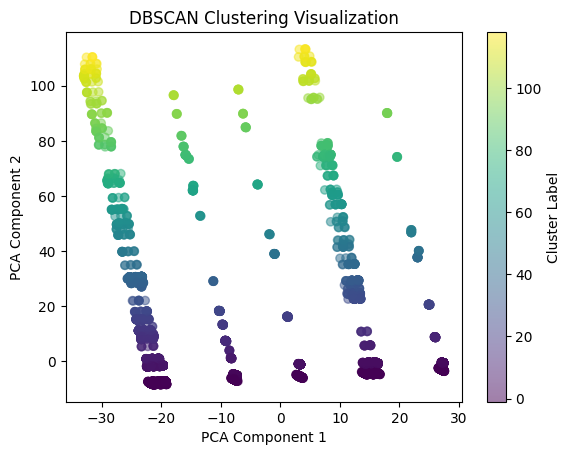

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=3.5, min_samples=5)  # Adjust 'eps' based on data distribution
clusters = dbscan.fit_predict(df)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Analyze cluster distribution
print("Cluster distribution:\n", df['Cluster'].value_counts())

# Visualize Clusters using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering Visualization")
plt.colorbar(label="Cluster Label")
plt.show()


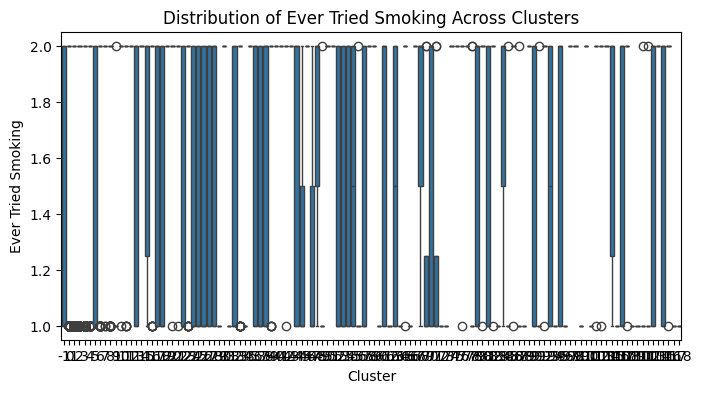

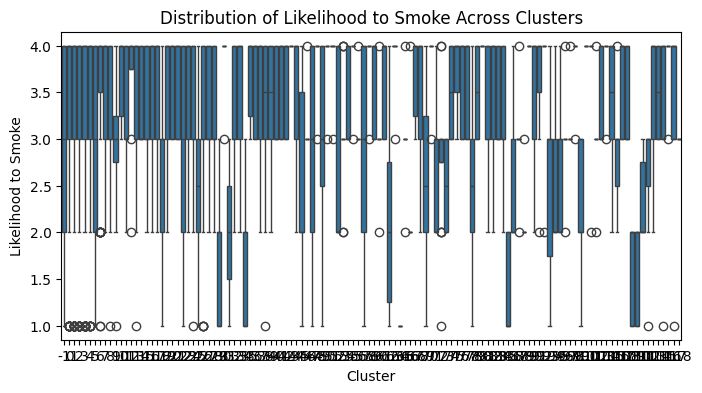

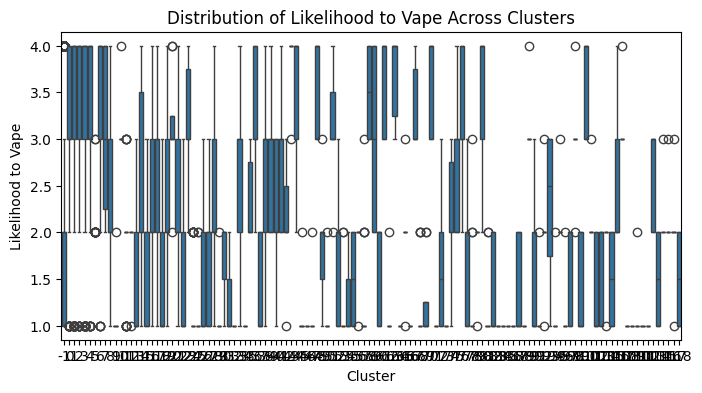

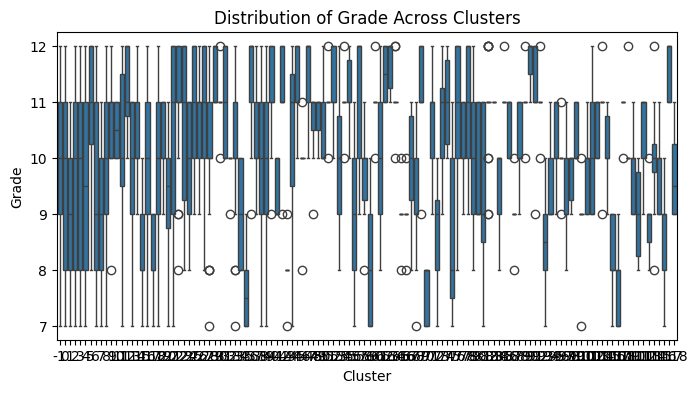

In [ ]:
# A dictionary mapping variable names to short descriptions
column_mapping = {
    "SS_010": "Ever Tried Smoking",
    "TS_011": "Likelihood to Smoke",
    "SS_030": "Ever Smoked a Whole Cigarette",
    "SS_040": "Smoked 100+ Cigarettes",
    "WP_040a": "Cigarettes/Day (Day 1)",
    "WP_040b": "Cigarettes/Day (Day 2)",
    "WP_040c": "Cigarettes/Day (Day 3)",
    "WP_040d": "Cigarettes/Day (Day 4)",
    "WP_040e": "Cigarettes/Day (Day 5)",
    "WP_040f": "Cigarettes/Day (Day 6)",
    "WP_040g": "Cigarettes/Day (Day 7)",
    "SC_010": "Tried to Quit Smoking",
    "CA_011": "Usual Cigarette Source",
    "TP_001": "Cigarettes in Last 30 Days",
    "TP_016": "Cigars in Last 30 Days",
    "TP_046": "Smokeless Tobacco in 30 Days",
    "TP_056": "Nicotine Therapy in 30 Days",
    "TP_066": "Hookah Use in 30 Days",
    "TP_086": "Heated Tobacco in 30 Days",
    "ELC_026a": "Vaped Nicotine (30 Days)",
    "ELC_026b": "Vaped No Nicotine (30 Days)",
    "ELC_026c": "Vaped Unknown Substance (30 Days)",
    "VAP_010": "Likelihood to Vape",
    "CI_010": "First Use: Cigarette or Vape?",
    "VAP_020": "Most Used Vape Flavor",
    "VAP_030": "Reason for Trying Vaping",
    "VAP_040": "Reason for Continued Vaping",
    "VAP_050a": "Usual Vape Device Source",
    "VAP_050b": "Usual E-Liquid Source",
    "VAP_060": "Tried to Quit Vaping",
    "SEQID": "Respondent ID",
    "PROVID": "Province",
    "GRADE": "Grade",
    "DVGENDER": "Gender",
    "DVURBAN": "Urban/Rural School",
    "DVRES": "Years in Canada",
    "DVORIENT": "Sexual Orientation",
    "DVDESCRIBE": "Ethnicity"
}

# The variables to visualize
selected_columns = ["Ever Tried Smoking", "Likelihood to Smoke", "Likelihood to Vape", "Grade"]

# Rename columns in the DataFrame
named_df=df.rename(columns=column_mapping)

# Display cluster modes
#cluster_modes = df.groupby('Cluster').agg(pd.Series.mode)
#print(cluster_modes)

# Generate boxplots for the selected columns
for col in selected_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=named_df['Cluster'], y=named_df[col])
    plt.title(f"Distribution of {col} Across Clusters")
    plt.show()



**Rerun the model with context data**

In [ ]:
# Load CSTADS data
cstads_df = df

# Load context data
context_file = "Context Data.csv"
context_df = pd.read_csv(context_file)

# Merge datasets on the 'province_id' column
merged_df = cstads_df.merge(context_df, on="PROVID", how="left")


Cluster distribution:
 Cluster
-1     5331
 3     3582
 0     2169
 1     2056
 2     1288
       ... 
 82       5
 87       5
 68       5
 91       5
 80       5
Name: count, Length: 94, dtype: int64


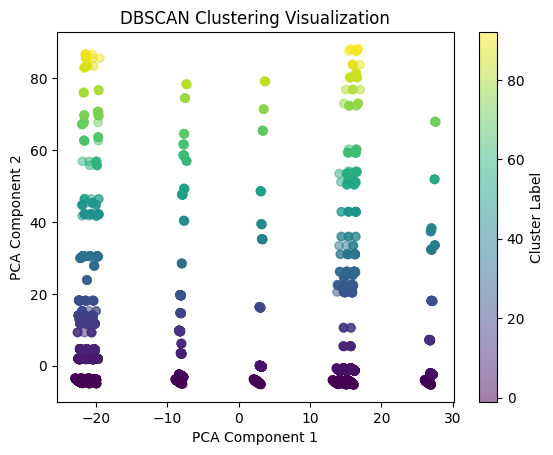

In [ ]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=3.5, min_samples=5)
clusters = dbscan.fit_predict(merged_df)

# Add cluster labels to the original dataframe
merged_df['Cluster'] = clusters

# Analyze cluster distribution
print("Cluster distribution:\n", merged_df['Cluster'].value_counts())

# Visualize Clusters using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(merged_df)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=merged_df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering Visualization")
plt.colorbar(label="Cluster Label")
plt.show()


**Model 2 - K-Means Clustering Analysis**

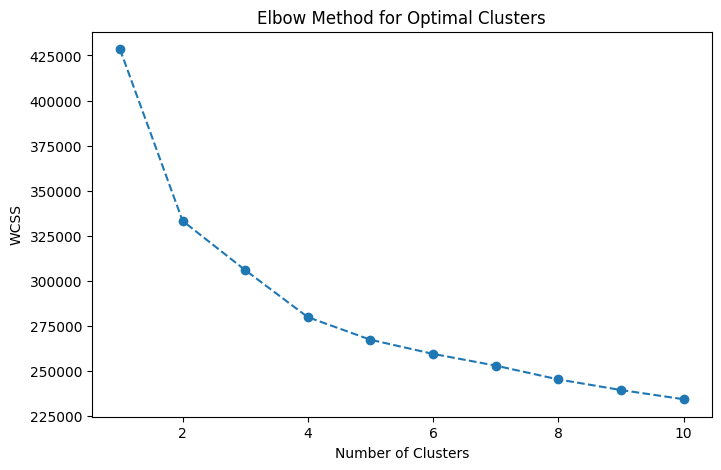

In [ ]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) using the original df dataset
X = df.drop(columns=['TS_011'], errors='ignore')  # Exclude the target variable

# Ensure X has no missing values using the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [ ]:
# Run K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Check cluster distribution
print(df['Cluster'].value_counts())

# Most common category per cluster
print(df.groupby('Cluster').apply(lambda x: x.mode().iloc[0]))


Cluster
0    5612
1    5278
4    3178
2    3083
3     702
Name: count, dtype: int64
0        SS_010  TS_011  TP_016  TP_046  TP_056  TP_066  TP_086  ELC_026a  \
Cluster                                                                     
0             2       4       5       5       5       5       5         5   
1             2       4       5       5       5       5       5         5   
2             2       4       5       5       5       5       5         4   
3             1       1       4       4       4       4       4         1   
4             1       3       5       5       5       5       5         1   

0        ELC_026b  ELC_026c  ...  VAP_050b  VAP_060  PROVID  GRADE  DVGENDER  \
Cluster                      ...                                               
0               5         5  ...         1        1      24     10         1   
1               5         5  ...         1        2      48      8         2   
2               5         5  ...         7        3     

<ipython-input-129-04196cd6a29f>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('Cluster').apply(lambda x: x.mode().iloc[0]))


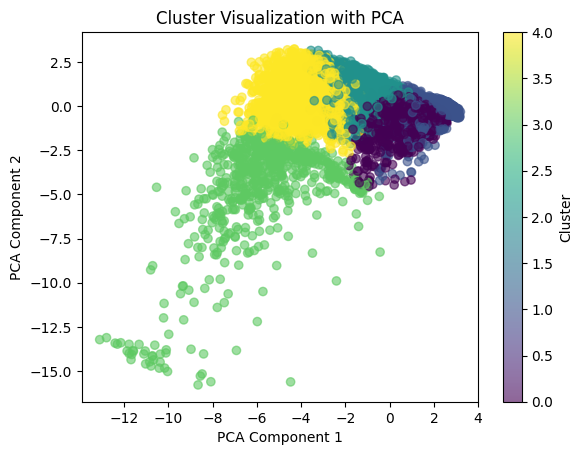

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Cluster Visualization with PCA")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
# Create a DataFrame showing how much each original feature contributes to PC1 and PC2
pca_loadings = pd.DataFrame(pca.components_, columns=X.columns, index=['PCA1', 'PCA2'])

# Display the loadings
print(pca_loadings.T.sort_values(by='PCA1', ascending=False))  # Sort by PC1 contribution
print(pca_loadings.T.sort_values(by='PCA2', ascending=False))  # Sort by PC2 contribution

                PCA1      PCA2
ELC_026a    0.341374 -0.117446
VAP_010     0.310791 -0.151067
SS_010      0.246812  0.059644
ELC_026b    0.225379  0.050585
ELC_026c    0.221861  0.064475
TP_056      0.210585  0.096700
TP_016      0.201025  0.366911
TP_046      0.169233  0.428861
TP_066      0.157439  0.425117
TP_086      0.148399  0.423811
DVRES       0.085906 -0.036159
DVDESCRIBE  0.084028 -0.053969
PROVID      0.061813 -0.084891
DVGENDER    0.009945 -0.156690
DVORIENT   -0.000461 -0.018479
DVURBAN    -0.024548  0.021373
Cluster    -0.086152 -0.220258
GRADE      -0.098996  0.008158
VAP_020    -0.225282  0.185512
VAP_030    -0.248979  0.071310
VAP_060    -0.257376  0.217523
VAP_050b   -0.264322  0.240404
CI_010     -0.289099  0.068861
VAP_040    -0.311637  0.173684
                PCA1      PCA2
TP_046      0.169233  0.428861
TP_066      0.157439  0.425117
TP_086      0.148399  0.423811
TP_016      0.201025  0.366911
VAP_050b   -0.264322  0.240404
VAP_060    -0.257376  0.217523
VAP_020 

**Rerun the analysis on the merged dataset**

In [ ]:
# Load CSTADS data
cstads_df = df

# Load context data
context_file = "Context Data.csv"
context_df = pd.read_csv(context_file)

# Merge datasets on the 'province_id' column
merged_df = cstads_df.merge(context_df, on="PROVID", how="left")

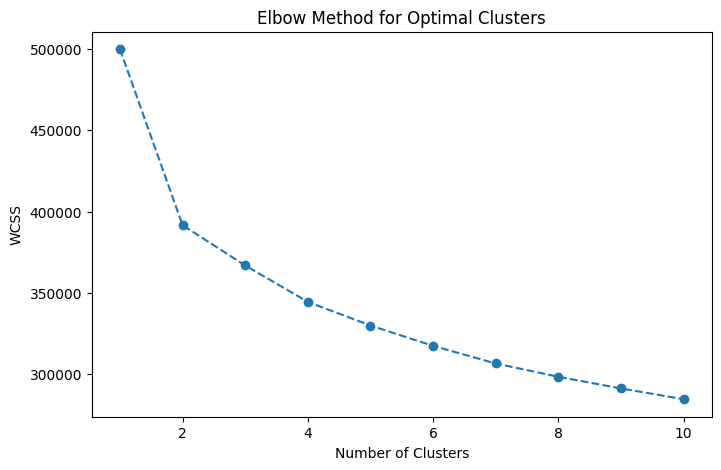

In [ ]:
# Define features (X) using the merged_df dataset
X = merged_df.drop(columns=['TS_011'], errors='ignore')  # Exclude the target variable

# Ensure X has no missing values using the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [ ]:
# Choose an appropriate number of clusters (k=5 based on the elbow method)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
merged_df['Cluster'] = cluster_labels

# Display cluster counts
print("Cluster distribution:\n", merged_df['Cluster'].value_counts())

Cluster distribution:
 Cluster
2    6496
3    5042
1    3352
4    2139
0     824
Name: count, dtype: int64


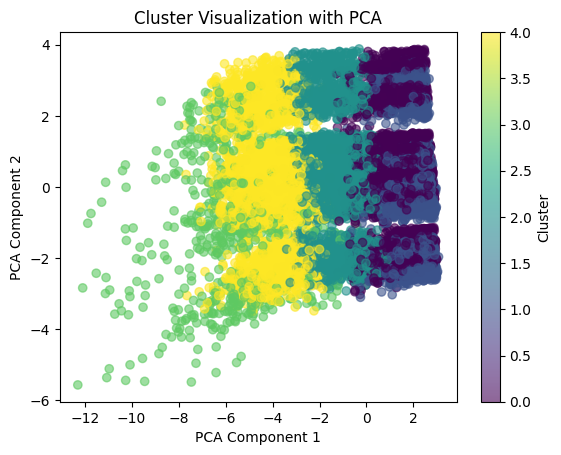

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Cluster Visualization with PCA")
plt.colorbar(label="Cluster")
plt.show()